In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
u = 2.0
E_u = 1.0
v_p = 3.0
E_p = 1.0

In [4]:
def gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

def g(v):
    return np.square(v)

def g_dash(v):
    return 2 * v

def p_u_given_v(u, v):
    return gaussian(u, g(v), E_u)

def p_v(v):
    return gaussian(v, v_p, E_p)

def p_u(u):
    return integrate.quad(lambda v: p_v(v) * p_u_given_v(u, v), -np.inf, np.inf)[0]

def p_v_given_u(v, u):
    return (p_v(v) * p_u_given_v(u, v)) / p_u(u)

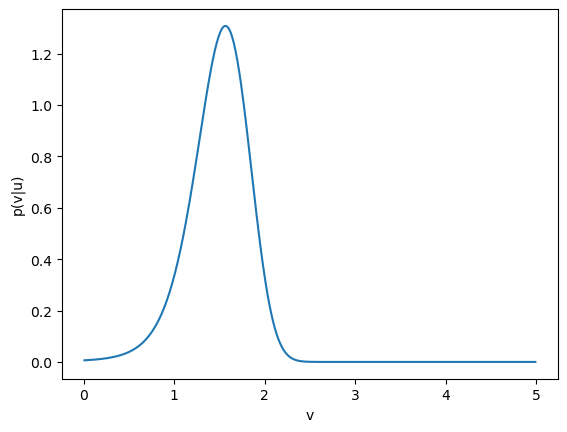

In [5]:
probs = []
vs = np.arange(0.01, 5, 0.01)
for v in vs:
    probs.append(p_v_given_u(v, u))
    
plt.plot(vs, probs)
plt.ylabel('p(v|u)')
plt.xlabel('v')
plt.show()


In [6]:
dfdphi = lambda phi: ((v_p - phi) / E_p) + ((u - g(phi)) / E_u) * (2 * phi)

Final phi: 1.6152992419608594


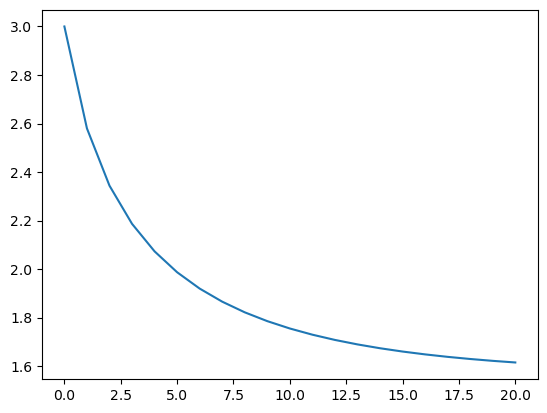

In [7]:
phi0 = v_p
dt = 0.01
phis = [phi0]

for i in range(20):
    phis.append(phis[-1] + dt * dfdphi(phis[-1]))

plt.plot(phis)
print(f"Final phi: {phis[-1]}")

In [8]:
def step(phi, e_p, e_u, dt=0.01):
    phi += dt * ((e_u * g_dash(phi)) - e_p)
    e_p += dt * (phi  - v_p - (E_p * e_p))
    e_u += dt * (u - g(phi) - (E_u * e_u))
    return phi, e_p, e_u

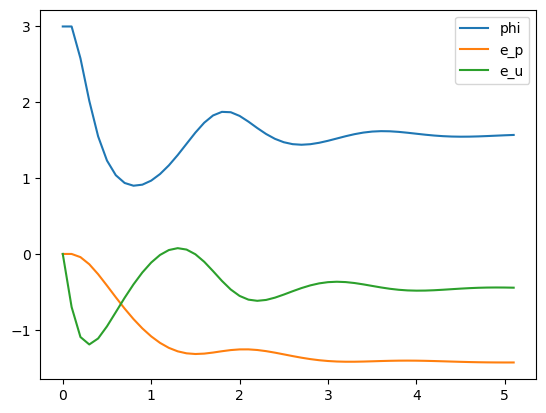

In [9]:
phi = v_p
e_p = e_u = 0.0

phis = [phi]
e_ps = [e_p]
e_us = [e_u]
times = [0.0]
dt = 0.1
end = 5.0

while times[-1] < end:
    phi, e_p, e_u = step(phi, e_p, e_u, dt=dt)
    phis.append(phi)
    e_ps.append(e_p)
    e_us.append(e_u)
    times.append(times[-1] + dt)

plt.plot(times, phis, label='phi')
plt.plot(times, e_ps, label='e_p')
plt.plot(times, e_us, label='e_u')
plt.legend()
plt.show()


## Exercise 5: Learning variance of a single prediction error node

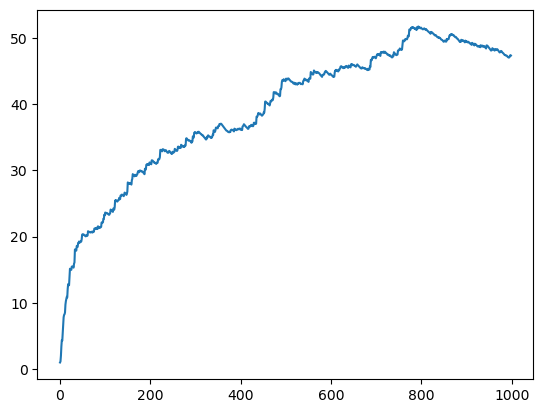

In [138]:
# np.random.seed(0)
def simulate(E_i0=1.0, n_trials=1000, steps=20, phi_mean=5, phi_var=2, g_phi=5, dt=0.1, lr=0.01):
    E_i = [E_i0]
    phi = np.random.normal(phi_mean, np.sqrt(phi_var), size=(n_trials, 1))

    for t in range(2,n_trials):
        eps = 0
        e = 0
        for s in range(2,int(steps/dt)):
            eps += dt*(phi[t] - g_phi - e)
            e += dt*(E_i[-1] * eps - e) # Note '=' instead of '+='
        E_i.append((E_i[-1] + lr * (eps * e - 1))[0])
    return E_i, phi

E_is, phi = simulate(phi_mean=100, g_phi=100, phi_var=50, lr=0.1)
plt.plot(E_is)

# Now for Multi-dimension input

In [141]:
x = np.ones((2,2))
x

array([[1., 1.],
       [1., 1.]])

In [422]:
x = np.array([2, 4])
np.sqrt(x)

array([1.41421356, 2.        ])

In [485]:
np.random.seed(3)
def simulate(Sigma0=np.eye(2), n_trials=500, steps=20, phi_mean=[0, 0], phi_var=[0.5, 1.5], g_phi=[0, 0], dt=0.01, lr=0.01):
    Sigma = [Sigma0]
    noise = np.random.normal(0, np.sqrt(0.5), size=(n_trials,1))
    phis = np.random.normal(phi_mean, np.sqrt(phi_var), size=(n_trials, len(phi_mean))) + noise

    for t in range(n_trials):
        eps = np.zeros(2)
        e = np.zeros(2)
        phi = phis[t]

        for s in range(int(steps/dt)):
            eps += dt*(phi - g_phi - e)
            e += dt*(eps @ Sigma[-1].T - e)
        delta = np.expand_dims(eps, axis=1) @ np.expand_dims(e, axis=0) - np.eye(2)
        # print(f"eps: {eps},\ne: {e},\ndelta:\n{delta}")
        Sigma.append((Sigma[-1] + lr * delta))
    return Sigma, phi

E_is, phi = simulate(n_trials=400, steps=20, dt=0.01)
# for i 
# plt.plot(E_is)
print(f"Sigma:\n{E_is[-1]}")


Sigma:
[[1.0530609  0.44553369]
 [0.4921755  2.06011327]]


In [ ]:
def simulate_full(
        Theta=1,
        Sigma_u=1,
        Sigma_p=1,
        n_trials=100, 
        steps=20, 
        u_mean=2,
        u_var=0.75,
        dt=0.01, 
        lr=0.01
    ):

    us = np.random.normal(u_mean, np.sqrt(u_var), (n_trials))

    for t in range(n_trials):
        u = us[t]
        phi = 0
        eps_u = 0
        eps_p = 0
        for s in range(steps):
            phi += dt*(-eps_p)


In [ ]:
Sigma_u = np.eye(2)
Sigma_p = np.eye(2)
Theta = np.ones((2,2))

def simulate_full(
        Theta=np.ones((2,2)), 
        Sigma_u=np.eye(2), 
        Sigma_p=np.eye(2), 
        n_trials=100, 
        steps=20, 
        u_means=[2, 4], 
        u_vars=[0.8, 1.2], 
        dt=0.01, 
        lr=0.01
    ):

    us = np.random.normal(u_means, np.sqrt(u_vars), (n_trials, len(u_means)))

    for t in range(trials):
        
